In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras

# Load and Prepare Data
df = pd.read_csv("main_data.csv")
df.fillna(0, inplace=True)

In [71]:
df.index = pd.to_datetime(df['date'])

<AxesSubplot: xlabel='date'>

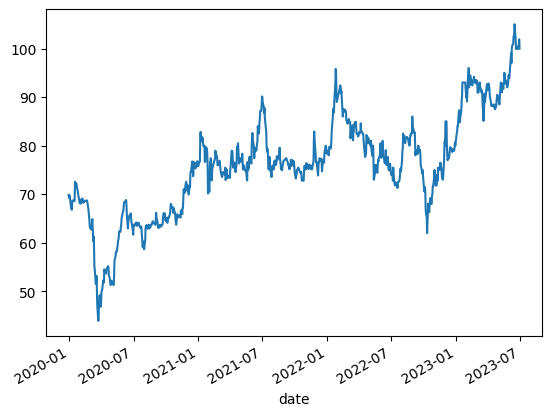

In [72]:
temp = df['vcb_close']
temp.plot()

In [73]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [74]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((869, 5, 1), (869,))

In [75]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((869, 5, 1), (869,), (0, 5, 1), (0,), (0, 5, 1), (0,))

In [76]:
# Evaluate each model
mse_list, rmse_list, mae_list = [], [], []

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                16896     
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [78]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 8)                 2056      
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [79]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_32 (Dense)            (None, 8)                 520       
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [80]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=1000, callbacks=[cp1])

Epoch 1/1000
28/28 [==============================] - 1s 6ms/step - loss: 5949.1284 - root_mean_squared_error: 77.1306
Epoch 2/1000
28/28 [==============================] - 0s 4ms/step - loss: 5927.4136 - root_mean_squared_error: 76.9897
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 5917.6382 - root_mean_squared_error: 76.9262
Epoch 4/1000
28/28 [==============================] - 0s 3ms/step - loss: 5910.3022 - root_mean_squared_error: 76.8785
Epoch 5/1000
28/28 [==============================] - 0s 3ms/step - loss: 5902.4268 - root_mean_squared_error: 76.8273
Epoch 6/1000
28/28 [==============================] - 0s 3ms/step - loss: 5894.2095 - root_mean_squared_error: 76.7738
Epoch 7/1000
28/28 [==============================] - 0s 3ms/step - loss: 5885.5366 - root_mean_squared_error: 76.7173
Epoch 8/1000
28/28 [==============================] - 0s 3ms/step - loss: 5881.2515 - root_mean_squared_error: 76.6893
Epoch 9/1000
28/28 [============================

In [81]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

28/28 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,2.795416,67.424
1,2.795416,66.810
2,2.795416,68.115
3,2.795416,68.730
4,2.795416,68.653
...,...,...
864,2.795416,100.000
865,2.795416,100.000
866,2.795416,101.100
867,2.795416,101.900


Text(0.5, 1.0, 'Model 1 Training Results')

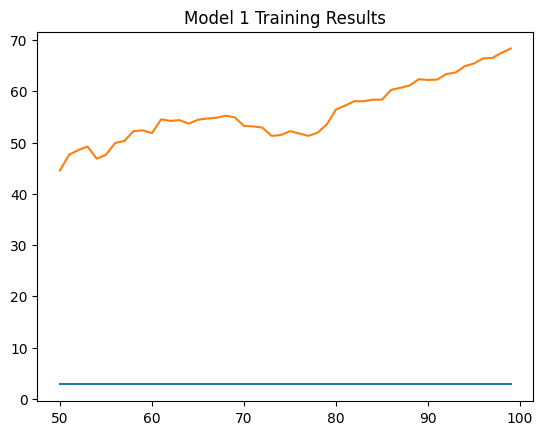

In [82]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.title("Model 1 Training Results")

In [83]:
mse = mean_squared_error(y_train1, train_predictions)
rmse = mean_squared_error(y_train1, train_predictions, squared=False)  
mae = mean_absolute_error(y_train1, train_predictions)
mse_list.append(mse)
rmse_list.append(rmse)
mae_list.append(mae)

In [84]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=1000, callbacks=[cp1])

Epoch 1/1000
28/28 [==============================] - 0s 2ms/step - loss: 6036.7905 - root_mean_squared_error: 77.6968
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 5824.7549 - root_mean_squared_error: 76.3201
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 5614.8301 - root_mean_squared_error: 74.9322
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 5416.9795 - root_mean_squared_error: 73.6001
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 5310.3936 - root_mean_squared_error: 72.8724
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 5212.8794 - root_mean_squared_error: 72.2003
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 5104.5933 - root_mean_squared_error: 71.4464
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 4985.0332 - root_mean_squared_error: 70.6048
Epoch 9/1000
28/28 [============================

In [85]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

28/28 [==============================] - 0s 676us/step


,Train Predictions,Actuals
0,68.171684,67.424
1,67.672646,66.810
2,67.329445,68.115
3,67.906036,68.730
4,68.569679,68.653
...,...,...
864,100.232910,100.000
865,100.063866,100.000
866,100.078354,101.100
867,100.765236,101.900


Text(0.5, 1.0, 'Model 2 Training Results')

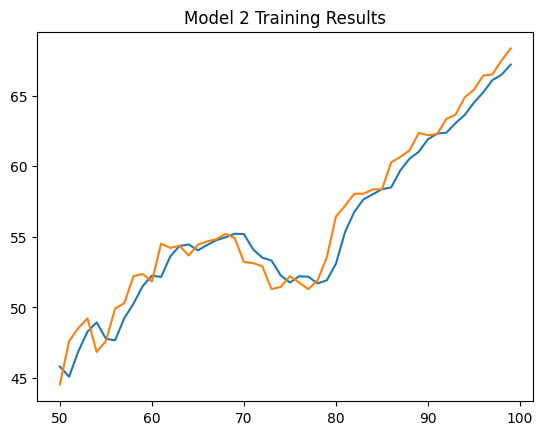

In [86]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.title("Model 2 Training Results")

In [87]:
mse = mean_squared_error(y_train1, train_predictions)
rmse = mean_squared_error(y_train1, train_predictions, squared=False)  
mae = mean_absolute_error(y_train1, train_predictions)
mse_list.append(mse)
rmse_list.append(rmse)
mae_list.append(mae)

In [88]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=1000, callbacks=[cp1])

Epoch 1/1000
28/28 [==============================] - 2s 8ms/step - loss: 5671.4561 - root_mean_squared_error: 75.3091
Epoch 2/1000
28/28 [==============================] - 0s 3ms/step - loss: 5598.8770 - root_mean_squared_error: 74.8256
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 5522.4541 - root_mean_squared_error: 74.3132
Epoch 4/1000
28/28 [==============================] - 0s 4ms/step - loss: 5441.7388 - root_mean_squared_error: 73.7681
Epoch 5/1000
28/28 [==============================] - 0s 4ms/step - loss: 5351.8521 - root_mean_squared_error: 73.1564
Epoch 6/1000
28/28 [==============================] - 0s 4ms/step - loss: 5256.8774 - root_mean_squared_error: 72.5043
Epoch 7/1000
28/28 [==============================] - 0s 4ms/step - loss: 5157.7622 - root_mean_squared_error: 71.8176
Epoch 8/1000
28/28 [==============================] - 0s 4ms/step - loss: 5049.4653 - root_mean_squared_error: 71.0596
Epoch 9/1000
28/28 [============================

In [89]:
train_predictions = model3.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

28/28 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,66.960091,67.424
1,67.079521,66.810
2,66.577866,68.115
3,67.891182,68.730
4,68.633446,68.653
...,...,...
864,100.399673,100.000
865,100.379906,100.000
866,100.394859,101.100
867,101.042030,101.900


Text(0.5, 1.0, 'Model 3 Training Results')

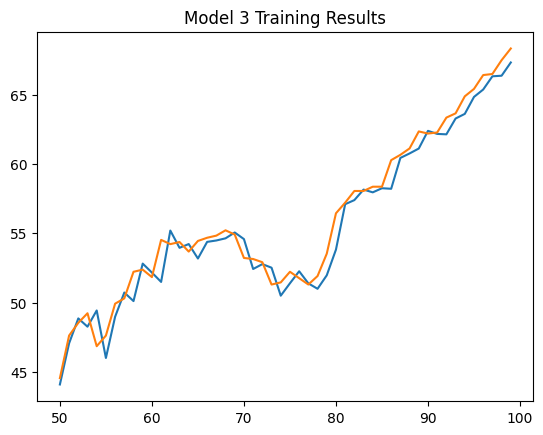

In [90]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.title("Model 3 Training Results")

In [91]:
mse = mean_squared_error(y_train1, train_predictions)
rmse = mean_squared_error(y_train1, train_predictions, squared=False)  
mae = mean_absolute_error(y_train1, train_predictions)
mse_list.append(mse)
rmse_list.append(rmse)
mae_list.append(mae)

In [98]:
# Creating a DataFrame to display metrics
metrics_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'MSE': mse_list,
    'RMSE': rmse_list,
    'MAE': mae_list
})

print(metrics_df)

     Model          MSE       RMSE        MAE
0  Model 1  5467.367547  73.941650  73.196196
1  Model 2     2.177584   1.475664   1.066118
2  Model 3     1.779551   1.333998   0.977055
